# Recognizing Traffic Signs
The goal of this project is to build a model capable of determining the type of traffic sign that is displayed in an image captured under different real-life conditions and showing obstructions, poor lighting, or even the sign being far away from the camera. We provide you with labeled images already splited in three files (tran/val/test) and a predefined list of signs to recognise. 

In [1]:
# # Download and unzip
# dataroot = "dataroot/"
# !mkdir dataroot 
# !wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
# !wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
# !wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip 

In [2]:
# only need to do once
'''
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
'''

'\n# Unzip\nimport zipfile\nwith zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:\n    zip_ref.extractall(dataroot)\nwith zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:\n    zip_ref.extractall(dataroot)\nwith zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:\n    zip_ref.extractall(dataroot)\n'

In [3]:
# Load sign names
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

A P file is a pickle file created by pickle, a Python module used for converting Python objects to a byte reprentation for storage on a disk or trasfer over a network. It allows to be conveniently stored and transmitted without first having to convert the data to another format. P files can be "unpickled" and loaded back into a program memory during run time.

In [4]:
# Load images
import pickle
dataroot = 'dataroot/'
signimages = pickle.load(open( dataroot+"train.p", "rb" ))

In [5]:
train_images = signimages
validation_images = pickle.load(open(dataroot+"valid.p", "rb"))
testing_images = pickle.load(open(dataroot+"test.p", "rb"))

In [6]:
signimages.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

The dict_keys are `coords`, `labels`, `features`, and `sizes`. 
* `coords`: This is the coordinates of the traffic signs in the images. It can be used to perform tasks like object localization or bounding box detection but it is not used in this project.
* `labels`: This contains the labels associated with each image. This is what we will be using for model training and evaluation.
* `features`: This is a 4D array containing the actual image data. Images are represented as arrays of pixel values. This key is what we will be using for image analysis and model training. (num examples, width, height, channels) 
* `sizes`: This is a 2D array containing the original width and height of each image. (NOTE THAT PICKLE FILE WITH RESIZE to 32 x 32)

In [7]:
print("The shape of features: ", signimages['features'].shape)
print("The shape of labels: ", signimages['labels'].shape)
print("The shape of coordinates: ", signimages['coords'].shape)
print("The shape of sizes: ", signimages['sizes'].shape)

The shape of features:  (34799, 32, 32, 3)
The shape of labels:  (34799,)
The shape of coordinates:  (34799, 4)
The shape of sizes:  (34799, 2)


In [8]:
num_records = len(signimages['features'])
print("Number of records: ", num_records)

Number of records:  34799


In [9]:
image_shape = signimages['features'][0].shape
print("Image data shape =", image_shape)

Image data shape = (32, 32, 3)


(32, 32, 3) Makes sense as the images are 32 x 32 pixels with 3 color channels (RGB).
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

The image shows a Turn left ahead sign


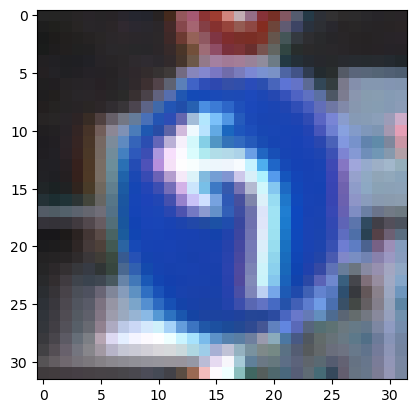

In [16]:
# Preview image
import matplotlib.pyplot as plt
import numpy as np
import cv2

image_index = 20123
plt.imshow(signimages['features'][image_index])
#plt.imshow()
#X = (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
print("The image shows a {} sign".format(signnames[signimages['labels'][image_index]]))

We can plot a histogram of pixel intesities for the sample image.
* `image.ravel()` : the ravel function flattens the 2d image into a 1d array.
* `bins=256` : the histogram will have 256 bins, one for each pixel intensity value.

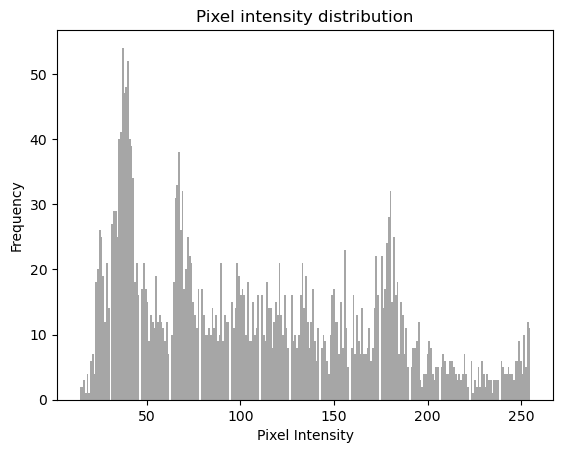

In [27]:
image = signimages['features'][image_index]
plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7)
#hist by R B G
#color = ('b','g','r')
# for i,col in enumerate(color):
#     histr = cv2.calcHist([image],[i],None,[256],[0,256])
#     plt.plot(histr,color = col)
#     plt.xlim([0,256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title("Pixel intensity distribution")
plt.show()

* We can take a sample of different sign types (maybe a few 2-3) look at the image and then plot the pixel intensity to see if we can infer what the sign is from the pixel intensity.

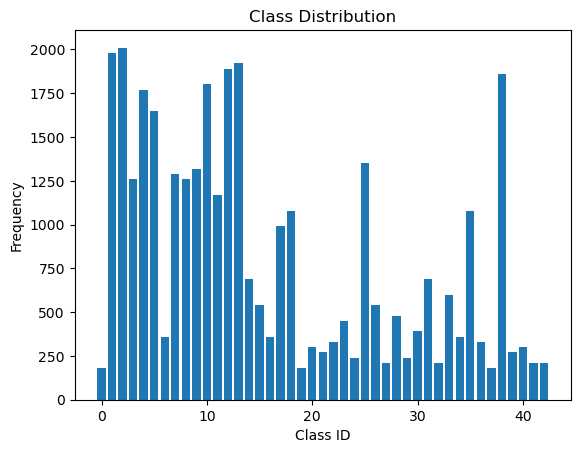

In [13]:
label_counts = pd.Series(signimages['labels']).value_counts().sort_index()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title("Class Distribution")
plt.show()

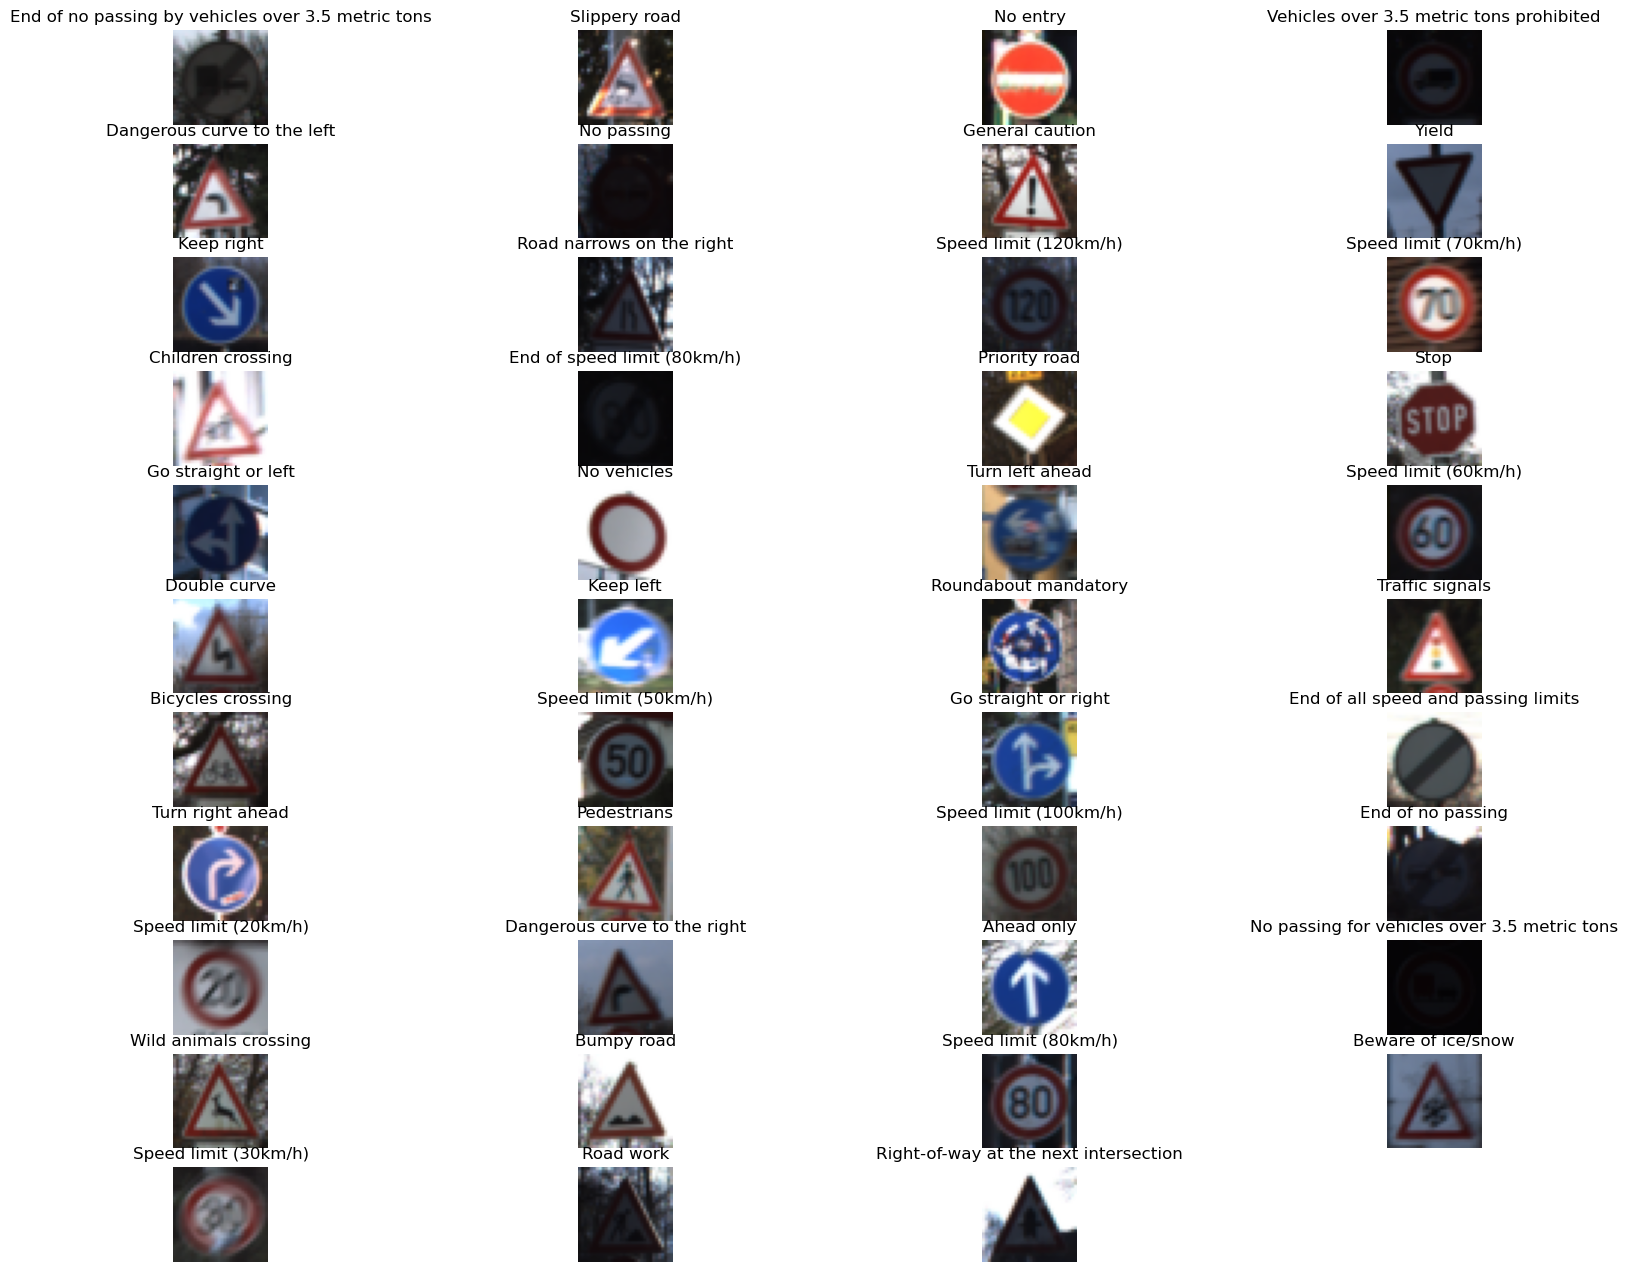

In [18]:
train_unique_index = np.unique(signimages['labels'], return_index=True)[1]
rows = len(train_unique_index)//4 + 1
f = plt.figure(figsize=(20,16))
for i, index in enumerate(train_unique_index, 1):
    plt.subplot(rows, 4, i)
    plt.imshow(signimages['features'][index-1])
    plt.axis('off')
    plt.title(signnames[signimages['labels'][index-1]])